### Actividad Mongo DB

In [2]:
!pip install pymongo

In [3]:
import pymongo
import numpy as np
import pandas as pd

from pprint import pprint

In [4]:
conn_str="mongodb://localhost:27017"
client=pymongo.MongoClient(conn_str,serverSelectionTimeoutMS=5000)
#para estar seguro de que funciona se hace ciclo try-except
try:
    pprint(client.server_info())
except Exception:
    print("No conectado")

{'allocator': 'tcmalloc',
 'bits': 64,
 'buildEnvironment': {'cc': 'cl: Microsoft (R) C/C++ Optimizing Compiler '
                            'Version 19.31.31107 for x64',
                      'ccflags': '/nologo /WX /FImongo/platform/basic.h '
                                 '/fp:strict /EHsc /W3 /wd4068 /wd4244 /wd4267 '
                                 '/wd4290 /wd4351 /wd4355 /wd4373 /wd4800 '
                                 '/wd4251 /wd4291 /we4013 /we4099 /we4930 '
                                 '/errorReport:none /MD /O2 /Oy- /bigobj '
                                 '/utf-8 /permissive- /Zc:__cplusplus '
                                 '/Zc:sizedDealloc /volatile:iso '
                                 '/diagnostics:caret /std:c++17 /Gw /Gy '
                                 '/Zc:inline',
                      'cppdefines': 'SAFEINT_USE_INTRINSICS 0 PCRE_STATIC '
                                    'NDEBUG BOOST_ALL_NO_LIB _UNICODE UNICODE '
                             

In [5]:
db=client["assignment"]
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, serverselectiontimeoutms=5000), 'assignment')

In [6]:
clicks=db["clicks"]
pprint(clicks.find())

In [7]:
tweets=db["tweets"]
tweets

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, serverselectiontimeoutms=5000), 'assignment'), 'tweets')

### 1. Configuración
- Se crearon el database y las colecciones en Mongo DB (Clicks y Tweets)
- Se logró la conexión  y se definió en jupyter tweets y clicks

### 2. Clics
### Seleccionar las columnas “_id”, “a”, y “cy” de clics
- Ordenar por cy en orden descendente
- Obtener sólo 3 filas
- Omitir la primera

In [8]:
pd.DataFrame(clicks.find({},{"a":1,"cy":1}))

,_id,a,cy
0,638694e90fe1b224725dd681,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,Jamshedpur
1,638694e90fe1b224725dd682,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,Washington
2,638694e90fe1b224725dd683,Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_3 like ...,Palm Desert
3,638694e90fe1b224725dd684,NaN,NaN
4,638694e90fe1b224725dd685,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...,Oss
...,...,...,...
3064,638694ea0fe1b224725de279,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,Richmond
3065,638694ea0fe1b224725de27a,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,Richmond
3066,638694ea0fe1b224725de27b,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,Bartlesville
3067,638694ea0fe1b224725de27c,Opera/9.80 (Windows NT 6.1; WOW64) Presto/2.12...,NaN


In [9]:
#Ordenar por orden descendente
pd.DataFrame(clicks.find({},{"a":1,"cy":1}).sort("cy",pymongo.DESCENDING))

,_id,a,cy
0,638694ea0fe1b224725ddf67,Mozilla/5.0 (Windows NT 5.1; rv:11.0) Gecko/20...,Zuzemberk
1,638694ea0fe1b224725ddefd,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...,Zoetermeer
2,638694ea0fe1b224725dda59,GoogleProducer; (+http://goo.gl/7y4SX),Zaventem
3,638694ea0fe1b224725ddfae,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...,Zarinsk
4,638694ea0fe1b224725de1c9,Mozilla/5.0 (Linux; U; Android 4.1.2; es-es; G...,Zaragoza
...,...,...,...
3064,638694ea0fe1b224725de26d,Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_3 like ...,NaN
3065,638694ea0fe1b224725de26f,Opera/9.80 (Series 60; Opera Mini/7.1.32444/29...,NaN
3066,638694ea0fe1b224725de278,Mozilla/5.0 (MeeGo; NokiaN9) AppleWebKit/534.1...,NaN
3067,638694ea0fe1b224725de27c,Opera/9.80 (Windows NT 6.1; WOW64) Presto/2.12...,NaN


In [10]:
#Obtener solo 3 filas
pd.DataFrame(clicks.find({},{"a":1,"cy":1}).sort("cy",pymongo.DESCENDING)).head(3)

,_id,a,cy
0,638694ea0fe1b224725ddf67,Mozilla/5.0 (Windows NT 5.1; rv:11.0) Gecko/20...,Zuzemberk
1,638694ea0fe1b224725ddefd,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...,Zoetermeer
2,638694ea0fe1b224725dda59,GoogleProducer; (+http://goo.gl/7y4SX),Zaventem


In [11]:
#Omitir primera fila
pd.DataFrame(clicks.find({},{"a":1,"cy":1}).sort("cy",pymongo.DESCENDING)).head(3).drop(0)

,_id,a,cy
1,638694ea0fe1b224725ddefd,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...,Zoetermeer
2,638694ea0fe1b224725dda59,GoogleProducer; (+http://goo.gl/7y4SX),Zaventem


### Crear una serie con todos los valores únicos de "a". Contar los usuarios de Opera y Mozilla utilizando el campo "a".

In [12]:
pd.DataFrame(clicks.aggregate([
    {
        "$match":{
            "$or":[{"a":{"$regex":"Opera"}},{"a":{"$regex":"Mozilla"}}]
        }
    },
    {"$count":"a"}
]))

,a
0,2830


### Encontrar cuántos usuarios hablan inglés

In [13]:
df_english=pd.DataFrame(clicks.find({"al":{"$regex":"en"}},{"_id":0})); df_english

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,kw
0,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,IN,0,Asia/Calcutta,38,15r91,10OBm3W,pontifier,"en-US,en;q=0.8",j.mp,direct,http://www.nsa.gov/,1368774597,1365701422,Jamshedpur,"[22.799999, 86.183296]",NaN
1,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1,America/New_York,DC,UcYpGN,SkcRGU,o_33avl0ri1b,en-US,1.usa.gov,http://fwp.mt.gov/,http://fwp.mt.gov/myfwp/,1368774600,1352828850,Washington,"[38.893299, -77.014603]",NaN
2,Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_3 like ...,US,0,America/Los_Angeles,CA,1084Psg,19Cztuz,tweetdeckapi,en-us,1.usa.gov,http://t.co/btKvKFBaF5,http://science.nasa.gov/science-news/science-a...,1368774599,1368774179,Palm Desert,"[33.7724, -116.345802]",NaN
3,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...,NL,0,Europe/Amsterdam,06,15r91,10OBm3W,pontifier,en-GB,j.mp,direct,http://www.nsa.gov/,1368774599,1365701422,Oss,"[51.766701, 5.5333]",NaN
4,Opera/9.80 (VRE; Opera Mini/4.2/29.3594; U; en...,None,0,,NaN,10wNFQH,10wNFQG,medlineplus4you,en,1.usa.gov,http://t.co/pUx3YOu5Jk,http://www.nlm.nih.gov/medlineplus/news/fullst...,1368774602,1368560441,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_2 like ...,CA,0,America/Montreal,QC,15RP5hF,106aUlD,spacedapp,en-us,spac.ee,https://m.facebook.com,http://apod.nasa.gov/apod/ap130517.html,1368778185,1368777605,Montreal,"[45.5, -73.583298]",NaN
1274,Mozilla/5.0 (MeeGo; NokiaN9) AppleWebKit/534.1...,None,0,,NaN,18OdFhW,18OdFhV,nasatwitter,"fi-FI,en,*",go.nasa.gov,http://t.co/hFwqTEFHsf,http://www.jpl.nasa.gov/news/news.php?release=...,1368778192,1368738515,NaN,NaN,NaN
1275,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1,America/Chicago,OK,UcYpGN,SkcRGU,o_33avl0ri1b,en-us,1.usa.gov,http://fwp.mt.gov/,http://fwp.mt.gov/myfwp/,1368778194,1352828850,Bartlesville,"[36.747299, -95.980797]",NaN
1276,Opera/9.80 (Windows NT 6.1; WOW64) Presto/2.12...,None,0,,NaN,15r91,10OBm3W,pontifier,"en-ZA,en;q=0.9",j.mp,direct,http://www.nsa.gov/,1368778196,1365701422,NaN,NaN,NaN


In [14]:
df_english.shape[0]

1278

### Encontrar cuántos usuarios son de Seoul

In [15]:
df_seoul=pd.DataFrame(clicks.find({"cy":{"$regex":"Seoul"}},{"_id":0}))
df_seoul.shape[0]

6

### 3. Tweets
- ¿Cuántas filas contiene la collección?
- Enumerar los screen_names de los usuarios que han tuiteado más de una vez.
- ¿Cuántos tweets son sobre Starbucks?
- ¿Cuántos tweets tienen el campo “retweeted_status”?
- Enumerar los tweets en español.
- Elaborar un gráfico de barra con el lenguaje del tweet en el eje X, y la cantidad de tweets en el eje Y.

In [35]:
df_tweets=pd.DataFrame(tweets.find({}))
t=df_tweets.shape[0]
print("Número de filas que contiene la colección:",t)

Número de filas que contiene la colección: 122


In [36]:
pd.DataFrame(tweets.find({},{"in_reply_to_screen_name":1}))

,_id,in_reply_to_screen_name
0,638694f90fe1b224725de280,None
1,638694f90fe1b224725de281,None
2,638694f90fe1b224725de282,None
3,638694f90fe1b224725de283,None
4,638694f90fe1b224725de284,None
...,...,...
117,638694f90fe1b224725de2f5,None
118,638694f90fe1b224725de2f6,None
119,638694f90fe1b224725de2f7,None
120,638694f90fe1b224725de2f8,None


In [37]:
df_sbx=pd.DataFrame(tweets.find({"text":{"$regex":"starbucks"}},{"_id":0}))
print(df_sbx.shape[0], "de los tweets son de Starbucks")

3 de los tweets son de Starbucks


In [38]:
df_rt=pd.DataFrame(tweets.find({"retweeted":True},{"_id":0}))
print(df_rt.shape[0], "de los tweets tienen el campo de retweeted status")

0 de los tweets tienen el campo de retweeted status


In [39]:
df_esp=pd.DataFrame(tweets.find({"lang":"es"},{"_id":0}))
df_esp

,contributors,truncated,text,in_reply_to_status_id,id,favorite_count,source,retweeted,coordinates,entities,...,favorited,user,geo,in_reply_to_user_id_str,lang,created_at,filter_level,in_reply_to_status_id_str,place,retweeted_status
0,None,False,"Pte. Roca entre 9 de Julio y 3 de Febrero, trá...",None,423879511961522200,0,"<a href=""http://twitter.com/download/android"" ...",False,None,"{'symbols': [], 'user_mentions': [], 'hashtags...",...,False,"{'follow_request_sent': None, 'profile_use_bac...",None,None,es,Thu Jan 16 18:08:45 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",NaN
1,None,False,"Hacerte la cortada, darte cuenta que se enojo ...",None,423879560040439800,0,web,False,None,"{'symbols': [], 'user_mentions': [], 'hashtags...",...,False,"{'follow_request_sent': None, 'profile_use_bac...",None,None,es,Thu Jan 16 18:08:57 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",NaN
2,None,False,Me he cortado el pelo y es como si me faltara ...,None,423879638805647360,0,"<a href=""http://twitter.com/download/android"" ...",False,None,"{'symbols': [], 'user_mentions': [], 'hashtags...",...,False,"{'follow_request_sent': None, 'profile_use_bac...",None,None,es,Thu Jan 16 18:09:15 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",NaN
3,None,False,RT @WilllSolace_HC: Hoy me he afeitado. Y me h...,None,423879638738546700,0,web,False,None,"{'symbols': [], 'user_mentions': [{'id': 16938...",...,False,"{'follow_request_sent': None, 'profile_use_bac...",None,None,es,Thu Jan 16 18:09:15 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...","{'contributors': None, 'truncated': False, 'te..."
4,None,False,Me gustaria saber como termine con el dedo co...,None,423879778874441700,0,"<a href=""http://twitter.com/download/android"" ...",False,None,"{'symbols': [], 'user_mentions': [], 'hashtags...",...,False,"{'follow_request_sent': None, 'profile_use_bac...",None,None,es,Thu Jan 16 18:09:49 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",NaN
5,None,False,Faaa re cortado,None,423879900446351360,0,"<a href=""http://blackberry.com/twitter"" rel=""n...",False,None,"{'symbols': [], 'user_mentions': [], 'hashtags...",...,False,"{'follow_request_sent': None, 'profile_use_bac...",None,None,es,Thu Jan 16 18:10:18 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",NaN
6,None,False,Las recargas de Nespresso son 1 sacacuartttooo...,None,423879983824908300,0,"<a href=""http://twitter.com/download/iphone"" r...",False,None,"{'symbols': [], 'user_mentions': [], 'hashtags...",...,False,"{'follow_request_sent': None, 'profile_use_bac...",None,None,es,Thu Jan 16 18:10:38 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",NaN
7,None,False,"""Te habla cortado dos minutos y ya flasheas qu...",None,423880069577453600,0,"<a href=""http://twitter.com/download/android"" ...",False,None,"{'symbols': [], 'user_mentions': [], 'hashtags...",...,False,"{'follow_request_sent': None, 'profile_use_bac...",None,None,es,Thu Jan 16 18:10:58 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",NaN
8,None,False,Tres días sin carro y me siento como si me hub...,None,423880141174243300,0,"<a href=""http://twitter.com/download/android"" ...",False,None,"{'symbols': [], 'user_mentions': [], 'hashtags...",...,False,"{'follow_request_sent': None, 'profile_use_bac...",None,None,es,Thu Jan 16 18:11:15 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",NaN
9,None,False,Me habian cortado internet los giles,None,423880236401307650,0,web,False,None,"{'symbols': [], 'user_mentions': [], 'hashtags...",...,False,"{'follow_request_sent': None, 'profile_use_bac...",None,None,es,Thu Jan 16 18:11:38 +0000 2014,medium,None,"{'place_type': 'city', 'country': 'United Stat...",NaN


In [40]:
print("Número de tweets en español:", df_esp.shape[0])

Número de tweets en español: 17


In [42]:
df_lang=pd.DataFrame(df_tweets["lang"].value_counts())
df_lang

,lang
en,82
es,17
it,9
tr,5
id,3
fr,2
pt,1
ja,1
sk,1
und,1


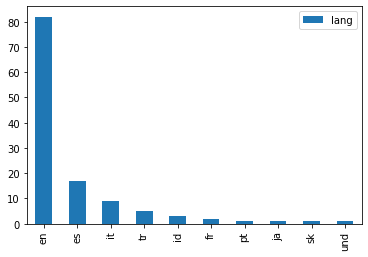

In [44]:
df_lang.plot(kind="bar");